In [20]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# Homework 2
## Hypothesis testing

Each task is worth 5 points, 20 points in total. Additionally, some tasks allow you to get a bonus point, that **can not** increase your total score for the homework beyond the maximum, but can compensate for some occasionally lost points.

### Task 1: multiple comparisons

A randomized, double-blind experiment was conducted to assess the
effectiveness of several drugs for reducing postoperative nausea. The
data are as follows:

In [21]:
df1 = pd.DataFrame({'Drug': ['Placebo', 'Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
                    'Number of Patients': [80, 75, 85, 67, 85],
                    'Incidence of Nausea': [45, 26, 52, 35, 37]})
df1['percentage'] = df1['Incidence of Nausea']/df1['Number of Patients']

In [22]:
df1

,Drug,Number of Patients,Incidence of Nausea,percentage
0,Placebo,80,45,0.562500
1,Chlorpromazine,75,26,0.346667
2,Dimenhydrinate,85,52,0.611765
3,Pentobarbital (100 mg),67,35,0.522388
4,Pentobarbital (150 mg),85,37,0.435294


In [23]:
import numpy as np
from scipy.stats import norm


In [24]:
# 𝐻0 : "𝑝𝑑𝑟𝑢𝑔=𝑝𝑝𝑙𝑎𝑐𝑒𝑏𝑜" that means delta = p1-p2 = 0
def delta (p1,p2):
    delta = p1-p2
    #print('delta = ', delta)
    return delta


In [25]:
def se(p1,p2,n1,n2):
    se = math.sqrt(((p1*(1-p1)/n1 + p2*(1-p2)/n2)))
    #print('se= ', se)
    return se

In [38]:
def wald_test(p1,p2,n1,n2):
    W = delta(p1,p2)/se(p1,p2,n1,n2)
    print('W = ', round(abs(W),3))
    return (abs(W) > norm.cdf(norm.ppf(0.95)))

In [33]:
def confident_interval(p1,p2,n1,n2):
    z = norm.ppf((1-0.05/2))
    bound_left = delta (p1,p2) - z*se(p1,p2,n1,n2)
    bound_right = delta (p1,p2) + z*se(p1,p2,n1,n2)
    print('delta = ', delta (p1,p2))
    print('se = ', se(p1,p2,n1,n2))
    print('Conf. interval:', '[', round(bound_left,3), round(bound_right,3),']')
    return bound_left, bound_right

In [34]:
def odds_ratios(p1,p2):
    odds_ratio = p1/(1-p1)/(p2/(1-p2))
    print('odds_ratio', round(odds_ratio,3))
    return odds_ratio

In [39]:
import math
p1 = float(df1[df1['Drug'] == 'Placebo'].percentage)
n1 = float(df1[df1['Drug'] == 'Placebo']['Number of Patients'])
for drug in df1.Drug[1:]: 
    p2 = float(df1[df1['Drug'] == drug].percentage)
    n2 = float(df1[df1['Drug'] == drug]['Number of Patients'])
    print(drug)
    left_b, right_b = confident_interval(p1,p2,n1,n2)
    print(left_b > 0 or right_b < 0)
    print('Wald criteria ', wald_test(p1,p2,n1,n2) )
    o_r = odds_ratios(p1,p2)
    print('---------------------')

Chlorpromazine
delta =  0.21583333333333332
se =  0.07807703712905512
Conf. interval: [ 0.063 0.369 ]
True
W =  2.764
Wald criteria  True
odds_ratio 2.423
---------------------
Dimenhydrinate
delta =  -0.04926470588235299
se =  0.07661847879507237
Conf. interval: [ -0.199 0.101 ]
False
W =  0.643
Wald criteria  False
odds_ratio 0.816
---------------------
Pentobarbital (100 mg)
delta =  0.04011194029850751
se =  0.08246231979025985
Conf. interval: [ -0.122 0.202 ]
False
W =  0.486
Wald criteria  False
odds_ratio 1.176
---------------------
Pentobarbital (150 mg)
delta =  0.12720588235294117
se =  0.0772534224000257
Conf. interval: [ -0.024 0.279 ]
False
W =  1.647
Wald criteria  True
odds_ratio 1.668
---------------------


In [41]:
p_val = []
for drug in df1.Drug[1:]: 
    p2 = float(df1[df1['Drug'] == drug].percentage)
    n2 = float(df1[df1['Drug'] == drug]['Number of Patients'])
    W = delta(p1,p2)/se(p1,p2,n1,n2)
    pvalue = 2 * norm.cdf(-np.abs(W))
    print(drug, ': p_value = ', round(pvalue,4))
    p_val.append(pvalue)

Chlorpromazine : p_value =  0.0057
Dimenhydrinate : p_value =  0.5202
Pentobarbital (100 mg) : p_value =  0.6267
Pentobarbital (150 mg) : p_value =  0.0996


In [42]:
from statsmodels.stats.multitest import multipletests
for method in ["bonferroni", "fdr_bh"]:
    
    reject, pvals, _, _ = multipletests(p_val, method=method, returnsorted=True)
    print(f"Method {method:10s}: reject=\n{reject}\n with p-values = \n{pvals}")

Method bonferroni: reject=
[ True False False False]
 with p-values = 
[0.02281357 0.39855693 1.         1.        ]
Method fdr_bh    : reject=
[ True False False False]
 with p-values = 
[0.02281357 0.19927847 0.62666409 0.62666409]


In [43]:
p_val = np.sort(np.array(p_val))
p_val

array([0.00570339, 0.09963923, 0.52023237, 0.62666409])

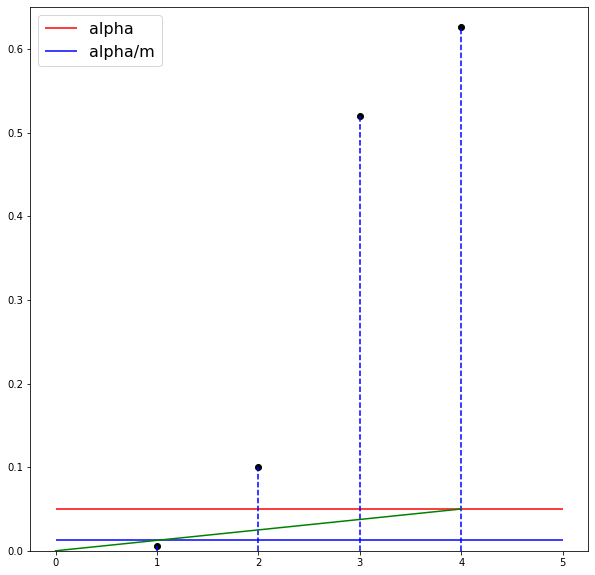

In [47]:
import matplotlib.pyplot as plt
alpha = 0.05
plt.figure(figsize=(10, 10))
plt.ylim(0,0.65)
plt.hlines(alpha, 0, 5, color = 'red', label = 'alpha')
plt.hlines(alpha/4, 0, 5, color = 'blue', label = 'alpha/m')
for i in range (p_val.shape[0]):
    plt.vlines(i+1, 0, p_val[i], color = 'blue', linestyle = '--')
plt.plot(np.arange(0,5), np.arange(0,5)*alpha/4, color = 'green')
plt.scatter(np.arange(1,5),p_val, c = 'black')
plt.legend(fontsize=16)

1. Test each drug versus the placebo at the 5% level. Also, report
the estimated odds–ratios. Summarize your findings. (2 points)
2. Use the Bonferroni and the FDR method to adjust for multiple
testing. (Beecher (1959)) (3 points)
3. Reproduce plot similar to Figure 10.6 from the book, displaying observed $p$-values and different thresholds used (1 bonus point)

*Hint*. Use simple $H_0$: "$p_{drug} = p_{placebo}$".

### Task 2: permutation test

For this task we will use the famous Iris dataset, originaly studied by R.A. Fisher himself.

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will select two species: *setosa* and *virginica* and study the sepal length.

In [17]:
X = iris[iris.species == 'setosa']['sepal_width'].values
Y = iris[iris.species == 'virginica']['sepal_width'].values

Test the hypothesis $H_0$: "quantiles of level 0.2 of both flowers are equal" vs $H_1$: "quantile of level 0.2 (20 percentile, lower 20%) of the sepal width of *setosa* flowers is  larger than that of *virginica* flowers". Use permutation test, approximate the full permutation distribution with 10,000 samples. (5 points)


In [231]:
def approximate_permutation_criteria(func, sample1, sample2, nruns):
    l1 = len(sample1)
    l2 = len(sample2)
    
    t_obs = func(sample1, sample2)
    sample_joint = np.r_[sample1, sample2]
    counter = 0.
    for r in range(nruns):
        sample_joint = np.random.permutation(sample_joint)
        t = func(sample_joint[:l1], sample_joint[l1:])
        counter += t > t_obs
        #counter += t > 0
#         print(f"{t:.3f}/{t_obs:.3f}")
    
    return counter / nruns

In [19]:
T = lambda sample1, sample2: np.quantile(sample1,0.2) - np.quantile(sample2,0.2)
pvalue = approximate_permutation_criteria(T, X, Y, nruns=10000)
f"Got p-value = {pvalue:.3f}"

'Got p-value = 0.000'

### Task 3: computational approach to hypothesis testing

Recommended reading: http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html

Consider the following dataset (service hours between failures of the air-conditioning equipment in a Boeing 720 jet aircraft , Proschan, 1963):

In [48]:
Y = np.array([3, 5, 7, 18, 43, 85, 91, 98, 100, 130, 230, 487])

(-0.55, 11.55, -24.35, 511.35)

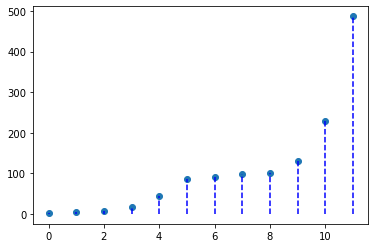

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(np.arange(len(Y)),Y)
for i in range (Y.shape[0]):
    plt.vlines(i, 0, Y[i], color = 'blue', linestyle = '--')
plt.axis(True)

(array([5., 3., 2., 0., 1., 0., 0., 0., 0., 1.]),
 array([  3. ,  51.4,  99.8, 148.2, 196.6, 245. , 293.4, 341.8, 390.2,
        438.6, 487. ]),
 <a list of 10 Patch objects>)

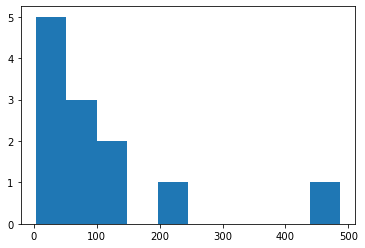

In [50]:
plt.hist(Y)


This sample was sorted for easier presentation.

In [51]:
# Compute an estimate of the median time between failures 
median_time = np.median(Y)
median_time

88.0

In [52]:
# Consider the null hypothesis  𝐻0  to be: "median time between failures is one week"
median_H0 = 7*24
median_H0

168

As a family distribution we will consider exponential distribution with pdf:

$$f(x, \lambda) =  \lambda e^{-\lambda x}$$

With parametr $\lambda > 0$

Text(0.5, 1.0, 'Exponential distribution')

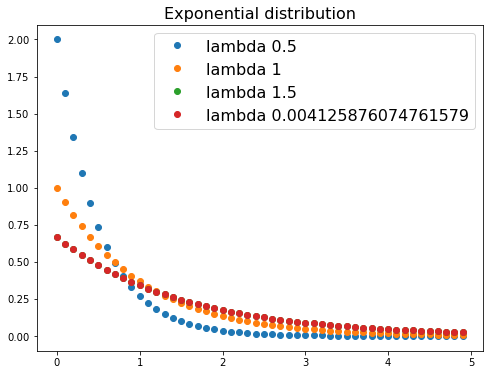

In [53]:
from scipy.stats import expon
import math
plt.figure(figsize=(8, 6))
lam = [0.5,1,1.5]
for l in lam:
    dist_pred = expon(loc=0, scale=l)
    points = np.arange(0,5,0.1)
    plt.plot(points, dist_pred.pdf(points), "o", label="lambda " + str(l))
l = math.log(2)/(7*24)
plt.plot(points, dist_pred.pdf(points), "o", label="lambda " + str(l))
plt.legend(fontsize=16)
plt.title('Exponential distribution',fontsize=16)

In [67]:
#test statistic test statistic to measure the deviation from  𝐻0

T = lambda sample1, sample2: np.abs(np.median(sample1) - np.median(sample2))

In [72]:
data_for_hist = []
def interesting_criteria(func, sample1, nruns):
    l = np.log(2)/(7*24)
    ex = expon(scale=1/l)
#r = ex.rvs(size=1000)
    t_obs = np.abs(88 - 7*24)
    counter = 0.
    for r in range(nruns):
        modeled_data = expon(0,1/l).rvs(size=len(sample1))
        #data_for_hist.append(modeled_data)
        t = func(7*24, modeled_data)
        data_for_hist.append(t)
        #print(t)
        counter += t > t_obs
#         print(f"{t:.3f}/{t_obs:.3f}")
    
    return counter / nruns

In [73]:
a = interesting_criteria(T, Y, 10000)
f"Got p-value = {a:e}"

'Got p-value = 2.123000e-01'

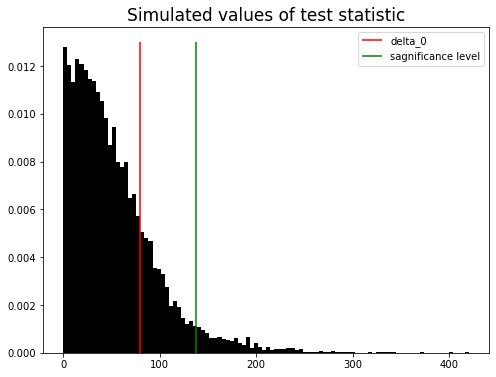

In [138]:

plt.figure(figsize=(8, 6))
plt.hist(data_for_hist, density=True, bins=100, color='black')
plt.vlines(168-88,0,0.013, color = 'red', label = 'delta_0')
plt.vlines(np.quantile(data_for_hist, 1-0.05),0,0.013, color = 'green', label = 'sagnificance level')
plt.title('Simulated values of test statistic', fontsize=17)
plt.legend(fontsize=10)
plt.show()

1. Compute an estimate of the median time between failures (1 point)
2. Consider the null hypothesis $H_0$ to be: "median time between failures is one week" (1 point)
3. What family of distributions will you choose for this kind of data under $H_0$? (1 point)
4. Choose a test statistic to measure the deviation from $H_0$ (1 point)
5. Check whether you can reject $H_0$ at significance level 5% and calculate the corresponding approximate $p$-value. Use 10,000 simulations for your experiment (1 point)
6. Plot histogram of the simulated values of the test statistic and mark the observed value and threshold that you obtained (1 bouns point)

### Task 4: power analysis

In 1861, 10 essays appeared in the New Orleans Daily Crescent. They
were signed “Quintus Curtius Snodgrass” and some people suspected
they were actually written by Mark Twain. To investigate this, we will
consider the proportion of three letter words found in an author’s work.
From eight Twain essays we have:

In [89]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])

From 10 Snodgrass essays we have:

In [90]:
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

In [91]:
x_mean = X.mean()
y_mean = Y.mean()

In [92]:
def wald_test_for_means(sample1, sample2, estimate=0):
    sample1_mean = np.mean(sample1)
    sample2_mean = np.mean(sample2)
    mean = sample1_mean - sample2_mean - estimate
    se = np.sqrt(np.var(sample1) / len(sample1) + np.var(sample2) / len(sample2))
    z = norm.ppf(1-0.05/2)
    left_bound = mean - se*z
    right_bound = mean + se*z
    statistic = np.abs(mean / se)
    pvalue = 2 * norm.cdf(-np.abs(statistic))
    return statistic, pvalue, left_bound, right_bound


In [93]:
statistic, pvalue, left_bound, right_bound = wald_test_for_means(X, Y, estimate=0)

In [99]:
f"p-value = {pvalue:e}"

'p-value = 7.992665e-05'

In [101]:
print('Conf. interval:', '[', round(left_bound,3), round(right_bound,3),']')

Pentobarbital (150 mg) : p_value =  7.9926649561458e-05
Conf. interval: [ 0.011 0.033 ]


In [113]:
def approximate_permutation_criteria(func, sample1, sample2, nruns):
    l1 = len(sample1)
    l2 = len(sample2)
    
    t_obs = func(sample1, sample2)
    sample_joint = np.r_[sample1, sample2]
    counter = 0.
    for r in range(nruns):
        sample_joint = np.random.permutation(sample_joint)
        t = func(sample_joint[:l1], sample_joint[l1:])
        counter += t > t_obs
        #counter += t > 0
#         print(f"{t:.3f}/{t_obs:.3f}")
    
    return counter / nruns

In [132]:
# Now use a permutation test to avoid the use of large sample methods. 
#T = lambda sample1, sample2: abs(np.mean(sample1) - np.mean(sample2))
pvalue = approximate_permutation_criteria(T, X, Y, nruns=10000)
f"Got p-value = {pvalue:.3f}"

'Got p-value = 0.001'

Reject H_0

In [104]:

print('mean for X', np.mean(X), 'var for X', np.var(X))
print('mean for Y', np.mean(Y), 'var for Y', np.var(Y))

mean for X 0.231875 var for X 0.00018560937500000004
mean for Y 0.2097 var for Y 8.400999999999999e-05


1. Perform a Wald test for equality of the means. Use the nonparametric plug-in estimator. Report the p-value and a 95% confidence
interval for the difference of means. What do you conclude? (1.5 points)
2. Now use a permutation test to avoid the use of large sample methods.
What is your conclusion? (Brinegar (1963)) (1.5 points)
3. Assume that samples do indeed come from different populations. Additionally, observed sample means and variaces for the two samples are equal to the true values for the respective population. Estimate the power of the two tests above under two model distributions for the data: Normal and [Beta](https://en.wikipedia.org/wiki/Beta_distribution). Use the same family for both samples (2 points)

In [110]:
# norm distribution Wald
mean_X = np.mean(X)
mean_Y = np.mean(Y)
var_X = np.var(X)
var_Y = np.var(Y)
norm_X = norm(mean_X, var_X)
norm_Y = norm(mean_Y, var_Y)
rejected = 0
for i in range (1000):
    new_data_x = norm_X.rvs(size = len(X))
    new_data_y = norm_Y.rvs(size = len(Y))
    statistic, pvalue, left_bound, right_bound = wald_test_for_means(new_data_x, new_data_y, estimate=0) 
    if (left_bound > 0 or right_bound < 0):
        rejected += 1
        
    

In [112]:
print('Wald Test power:',rejected/1000)

Wald Test power: 1.0


In [120]:
# norm distribution permutatuon'
rejected_norm_perm = 0
mean_X = np.mean(X)
mean_Y = np.mean(Y)
var_X = np.var(X)
var_Y = np.var(Y)
norm_X = norm(mean_X, var_X)
norm_Y = norm(mean_Y, var_Y)
rejected = 0
for i in range (1000):
    new_data_x = norm_X.rvs(size = len(X))
    new_data_y = norm_Y.rvs(size = len(Y))
    pvalue = approximate_permutation_criteria(T, new_data_x, new_data_y, nruns=10000)
    if pvalue < 0.05:
        rejected_norm_perm += 1
        

In [121]:
print('Permutation Test power:',rejected_norm_perm/1000)

Permutation Test power: 1.0


In [123]:
# beta distribution Wald
from scipy.stats import beta
rejected_wald_beta = 0
par_X_beta = beta.fit(X)
par_Y_beta = beta.fit(Y)
beta_X = beta(*par_X_beta)
beta_Y = beta(*par_Y_beta)

for i in range (1000):
    new_data_x_beta = beta_X.rvs(size = len(X))
    new_data_y_beta = beta_Y.rvs(size = len(Y))
    statistic, pvalue, left_bound, right_bound = wald_test_for_means(new_data_x_beta, new_data_y_beta, estimate=0) 
    if (left_bound > 0 or right_bound < 0):
        rejected_wald_beta += 1

In [124]:
print('Wald Test power for beta distribution:',rejected_wald_beta/1000)

Wald Test power for beta distribution: 1.0


In [125]:
# beta distribution permutatuon'
rejected_beta_perm = 0
rejected_wald_beta = 0
par_X_beta = beta.fit(X)
par_Y_beta = beta.fit(Y)
beta_X = beta(*par_X_beta)
beta_Y = beta(*par_Y_beta)
rejected = 0
for i in range (1000):
    new_data_x_beta = beta_X.rvs(size = len(X))
    new_data_y_beta = beta_Y.rvs(size = len(Y))
    pvalue = approximate_permutation_criteria(T, new_data_x_beta, new_data_y_beta, nruns=10000)
    if pvalue < 0.05:
        rejected_beta_perm += 1

In [126]:
print('Permutation Test power for beta distribution:',rejected_beta_perm/1000)

Permutation Test power for beta distribution: 0.999
